# Augmentation Method #1 - Reverse
<br><br>
- Implementation of the first augmentation method
- It takes in a pandas Dataframe of multivariate time series and returns another DataFrame in which the time series have all been reversed

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from random import randrange
import rocket
import mpdatasets

<br><br>

- Quite simple concept, each time series will be reversed
- These reversed datasets will then be combined with the original dataset
- The output shows that the reversed dataset is the same size as the original dataset, as expected

In [3]:
train_x, train_y, test_x, test_y = mpdatasets.load_datasets()

In [5]:
 def reverse_dataframe(dfx):
    reversed_rows = []

    # Loop through each row
    for i in range(dfx.shape[0]):
        body_parts = []

        #Loop through each body part in the row
        for j in range(dfx.shape[1]):
            # appends reversed time series to the body_parts array
            # reset the index of the series as otherwise it gets reversed as well
            body_parts.append(dfx.iloc[i][j][::-1].reset_index(drop=True))
        reversed_rows.append(body_parts) # append all reversed time series for row i of train_x to the reversed_rows array
    
    reverse_frame = pd.DataFrame(reversed_rows)
    reverse_frame.columns = dfx.columns
    return reverse_frame
    

In [6]:
reversed_df = reverse_dataframe(train_x)

print(f"Dimensions: {reversed_df.shape}")

Dimensions: (1426, 36)


- You can see below that the first time series of reversed_df is the reverse of the first time series in train_x

In [7]:
print(f"Original Time Series:\n {train_x.iloc[0][0][:10]}")

Original Time Series:
 0    191.832000
1    191.974310
2    191.925995
3    191.810725
4    191.752170
5    191.874000
6    192.258008
7    192.818472
8    193.427860
9    193.960184
dtype: float64


In [8]:
print(f"Revesed Time Series:\n{reversed_df.iloc[0][0][-10:]}")

Revesed Time Series:
151    193.960184
152    193.427860
153    192.818472
154    192.258008
155    191.874000
156    191.752170
157    191.810725
158    191.925995
159    191.974310
160    191.832000
dtype: float64


<br><br>
### Plot of the same time series before and after it has been reversed

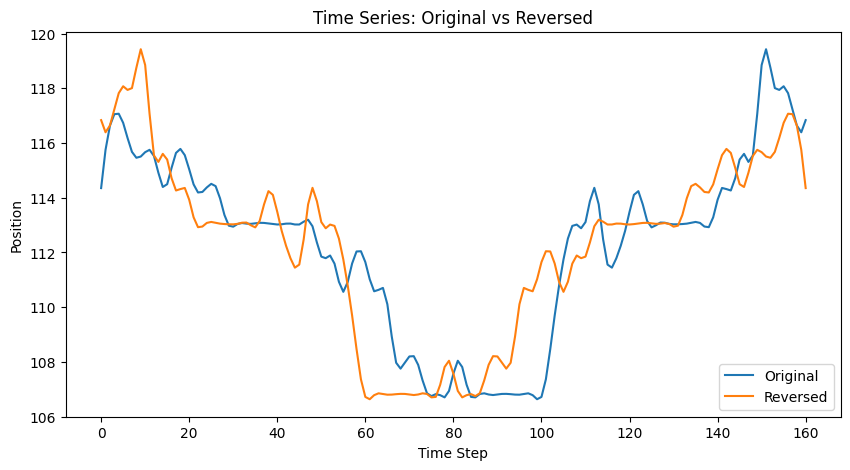

In [28]:
plt.figure(figsize=(10, 5))

plt.title("Time Series: Original vs Reversed")

plt.plot(train_x.loc[3]['RWrist_Y'], label='Original')
plt.plot(reversed_df.loc[3]['RWrist_Y'], label='Reversed')
plt.xlabel("Time Step")
plt.ylabel("Position")


plt.legend(loc='lower right')
plt.savefig('Images/Reverse.png')

plt.show()

- Combine the original train_x dataset with the new reversed dataset.

- The class labels should remain unchanged when reversed so the train_y dataset is simply appended to itself to match aug_train_x

- As shown below, the two augmented training sets correctly have the same number of rows

In [29]:
aug_train_x = reverse_dataframe(train_x)
aug_train_x = pd.concat([train_x, aug_train_x], axis=0)

aug_train_y = np.append(train_y, train_y, axis=0)

print(aug_train_x.shape)
print(aug_train_y.shape)

(2852, 36)
(2852,)


- Train model using the augmented datasets
- Results in the below accuracy

Accuracy: 82.18487394957982

In [31]:
acc, preds = rocket.run_classifier(aug_train_x, aug_train_y, test_x, test_y)
print(f"Accuracy: {acc}")

[Pipeline] ............ (step 1 of 3) Processing rocket, total= 4.8min
[Pipeline] ......... (step 2 of 3) Processing normalise, total=   1.4s
[Pipeline] ............. (step 3 of 3) Processing model, total=   8.9s
Accuracy: 82.18487394957982
